In [1]:
import matplotlib.pyplot as plt
from pya import *

%matplotlib widget

# Simulation

In [16]:
import simulation

n = 128
sim_speed = 0.004
sim_fps = 500
duration = 6
frame_amount = duration * sim_fps

# initial_state = np.array([[simulation.gaussian(x, y, n, offset=[-0.7, 0.0], width=0.15, height=0.6) for x in range(n)] for y in range(n)])
initial_state = np.array([[simulation.gaussian(x, y, n, offset=[-0.3, 0.0], width=0.07, height=0.25) for x in range(n)] for y in range(n)])
# initial_state = np.array([[simulation.gaussian_x_impulse(x, y, n, offset=[-0.7, 0.0], width=0.15, height=0.6, impulse=0.03) for x in range(n)] for y in range(n)])
# initial_state = np.array([[simulation.gaussian_x_impulse(x, y, n, offset=[-0.72, 0.0], width=0.075, height=0.3, impulse=0.04) for x in range(n)] for y in range(n)])
# initial_state = np.array([[simulation.gaussian(x, y, n, offset=[-0.6, 0.0], width=0.05) for x in range(n)] for y in range(n)]) + np.array([[simulation.gaussian(x, y, n, offset=[-0.62, 0.0], width=0.05, imag=True) for x in range(n)] for y in range(n)])
potential = np.array([[simulation.parabola(x, y, n, offset=(0, 0), factor=(40000, 40000, 2)) for x in range(n)] for y in range(n)])
# potential = np.array([[complex(0, 0) for x in range(n)] for y in range(n)])

barrier_x = n // 2 - 1
barrier_width = 2
multi_slit = [(-15, -13), (-8, -6), (-1, 1), (6, 8), (13, 15)]
double_slit = [(-5, -1), (2, 6)]
wide_double_slit = [(-35, -25), (26, 36)]
half_wide_double_slit = [(-15, -8), (9, 16)]
single_slit = [(-6, 7)]
slits = half_wide_double_slit

# action
frames = simulation.sim(n, sim_fps, duration, slits, barrier_x, barrier_width, sim_speed, initial_state=initial_state, potential=potential, wall_width=4)

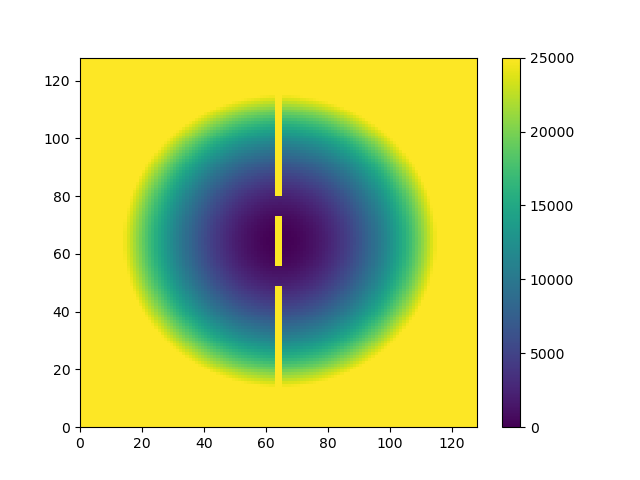

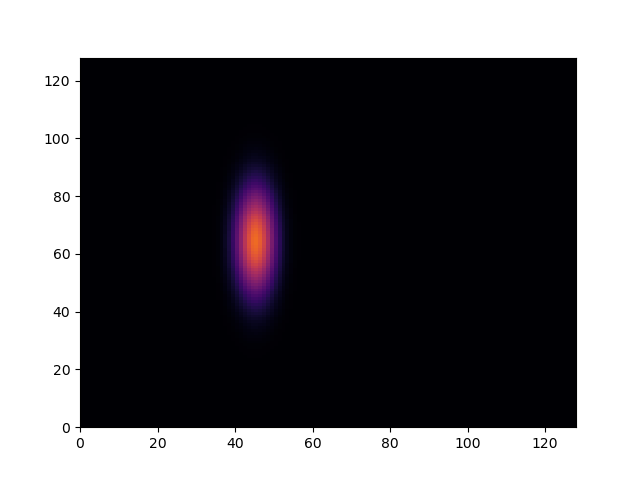

In [17]:
import matplotlib
plt.figure()
plt.pcolormesh(np.abs(frames[0]) ** 2, cmap='inferno', norm=matplotlib.colors.PowerNorm(vmin=0, vmax=np.max(np.square(np.abs(frames))), gamma=0.4))
plt.figure()
plt.pcolormesh(np.abs(potential), vmin=0, vmax=25000)
plt.colorbar()
plt.show()

# Video

video saved as output/sim_2024_04_30-13_37_30.mp4


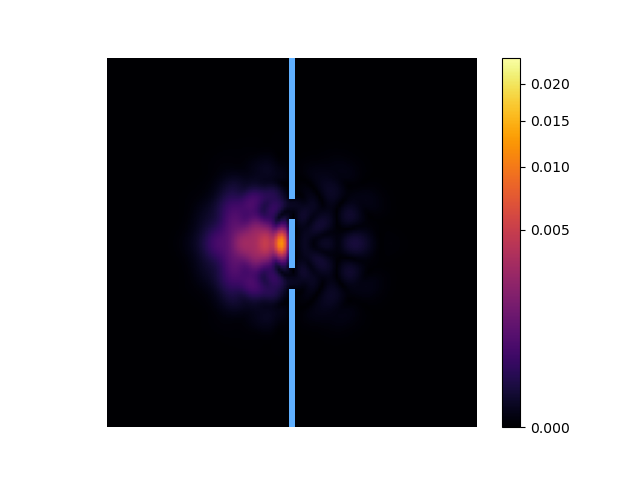

In [18]:
import video

# save video
video_filename, anim = video.create(frames, 20, 0.5, frame_amount, sim_fps, slits, barrier_x, barrier_width, n, save=True)

# plt.close()